# **Part 1. Prepare Data**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure 
import time
import math  

from sklearn.preprocessing import LabelEncoder, MinMaxScaler, OrdinalEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, GradientBoostingRegressor, RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
from lightgbm import LGBMRegressor
from sklearn import  metrics
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.svm import SVR

from scipy.stats import pearsonr
from IPython.display import display
import os
plt.style.use("seaborn")
%matplotlib inline  
import warnings
warnings.filterwarnings("ignore")

In [ ]:
url = 'https://raw.githubusercontent.com/soncx/Cost-Prediction-on-Customer-Acquisition/main/media%20prediction%20and%20its%20cost.csv'
df = pd.read_csv(url)

In [ ]:
pd.set_option("display.max_columns",40)
df.head(5)

,food_category,food_department,food_family,store_sales(in millions),store_cost(in millions),unit_sales(in millions),promotion_name,sales_country,marital_status,gender,total_children,education,member_card,occupation,houseowner,avg_cars_at home(approx),avg. yearly_income,num_children_at_home,avg_cars_at home(approx).1,brand_name,SRP,gross_weight,net_weight,recyclable_package,low_fat,units_per_case,store_type,store_city,store_state,store_sqft,grocery_sqft,frozen_sqft,meat_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,media_type,cost
0,Breakfast Foods,Frozen Foods,Food,7.36,2.7232,4.0,Bag Stuffers,USA,M,F,1.0,Partial High School,Normal,Skilled Manual,Y,1.0,$10K - $30K,1.0,1.0,Carrington,1.84,19.70,17.70,1.0,0.0,17.0,Deluxe Supermarket,Salem,OR,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Daily Paper, Radio",126.62
1,Breakfast Foods,Frozen Foods,Food,5.52,2.5944,3.0,Cash Register Lottery,USA,M,M,0.0,Bachelors Degree,Silver,Professional,Y,4.0,$50K - $70K,0.0,4.0,Carrington,1.84,19.70,17.70,1.0,0.0,17.0,Deluxe Supermarket,Salem,OR,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Daily Paper, Radio",59.86
2,Breakfast Foods,Frozen Foods,Food,3.68,1.3616,2.0,High Roller Savings,USA,S,F,4.0,Partial High School,Normal,Manual,N,1.0,$10K - $30K,0.0,1.0,Carrington,1.84,19.70,17.70,1.0,0.0,17.0,Deluxe Supermarket,Salem,OR,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Daily Paper, Radio",84.16
3,Breakfast Foods,Frozen Foods,Food,3.68,1.1776,2.0,Cash Register Lottery,USA,M,F,2.0,High School Degree,Bronze,Manual,Y,2.0,$30K - $50K,2.0,2.0,Carrington,1.84,19.70,17.70,1.0,0.0,17.0,Deluxe Supermarket,Salem,OR,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,In-Store Coupon,95.78
4,Breakfast Foods,Frozen Foods,Food,4.08,1.4280,3.0,Double Down Sale,USA,M,M,0.0,Partial High School,Bronze,Skilled Manual,N,2.0,$30K - $50K,0.0,2.0,Golden,1.36,7.12,5.11,0.0,1.0,29.0,Deluxe Supermarket,Salem,OR,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,Radio,50.79


# **Part 2. Exploratory Data Analysis**


In [ ]:
df.shape

(60428, 40)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60428 entries, 0 to 60427
Data columns (total 40 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   food_category               60428 non-null  object 
 1   food_department             60428 non-null  object 
 2   food_family                 60428 non-null  object 
 3   store_sales(in millions)    60428 non-null  float64
 4   store_cost(in millions)     60428 non-null  float64
 5   unit_sales(in millions)     60428 non-null  float64
 6   promotion_name              60428 non-null  object 
 7   sales_country               60428 non-null  object 
 8   marital_status              60428 non-null  object 
 9   gender                      60428 non-null  object 
 10  total_children              60428 non-null  float64
 11  education                   60428 non-null  object 
 12  member_card                 60428 non-null  object 
 13  occupation                  604

In [ ]:
df.describe()

,store_sales(in millions),store_cost(in millions),unit_sales(in millions),total_children,avg_cars_at home(approx),num_children_at_home,avg_cars_at home(approx).1,SRP,gross_weight,net_weight,recyclable_package,low_fat,units_per_case,store_sqft,grocery_sqft,frozen_sqft,meat_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,cost
count,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000
mean,6.541031,2.619460,3.093169,2.533875,2.200271,0.829351,2.200271,2.115258,13.806433,11.796289,0.558665,0.350434,18.860694,27988.477494,19133.799696,5312.852552,3541.846280,0.612646,0.354157,0.587956,0.587956,0.562603,99.262366
std,3.463047,1.453009,0.827677,1.490165,1.109644,1.303424,1.109644,0.932829,4.622693,4.682986,0.496551,0.477110,10.258555,5701.022090,3987.395735,1575.907263,1050.471635,0.487150,0.478261,0.492207,0.492207,0.496069,30.011257
min,0.510000,0.163200,1.000000,0.000000,0.000000,0.000000,0.000000,0.500000,6.000000,3.050000,0.000000,0.000000,1.000000,20319.000000,13305.000000,2452.000000,1635.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.790000
25%,3.810000,1.500000,3.000000,1.000000,1.000000,0.000000,1.000000,1.410000,9.700000,7.710000,0.000000,0.000000,10.000000,23593.000000,16232.000000,4746.000000,3164.000000,0.000000,0.000000,0.000000,0.000000,0.000000,69.650000
50%,5.940000,2.385600,3.000000,3.000000,2.000000,0.000000,2.000000,2.130000,13.600000,11.600000,1.000000,0.000000,19.000000,27694.000000,18670.000000,5062.000000,3375.000000,1.000000,0.000000,1.000000,1.000000,1.000000,98.520000
75%,8.670000,3.484025,4.000000,4.000000,3.000000,1.000000,3.000000,2.790000,17.700000,16.000000,1.000000,1.000000,28.000000,30797.000000,22123.000000,5751.000000,3834.000000,1.000000,1.000000,1.000000,1.000000,1.000000,126.620000
max,22.920000,9.726500,6.000000,5.000000,4.000000,5.000000,4.000000,3.980000,21.900000,20.800000,1.000000,1.000000,36.000000,39696.000000,30351.000000,9184.000000,6122.000000,1.000000,1.000000,1.000000,1.000000,1.000000,149.750000


## **Check missing values**

In [ ]:
df.isnull().sum()

food_category                 0
food_department               0
food_family                   0
store_sales(in millions)      0
store_cost(in millions)       0
unit_sales(in millions)       0
promotion_name                0
sales_country                 0
marital_status                0
gender                        0
total_children                0
education                     0
member_card                   0
occupation                    0
houseowner                    0
avg_cars_at home(approx)      0
avg. yearly_income            0
num_children_at_home          0
avg_cars_at home(approx).1    0
brand_name                    0
SRP                           0
gross_weight                  0
net_weight                    0
recyclable_package            0
low_fat                       0
units_per_case                0
store_type                    0
store_city                    0
store_state                   0
store_sqft                    0
grocery_sqft                  0
frozen_s

There are not any missing values all over features.

## **Check feature correlation**

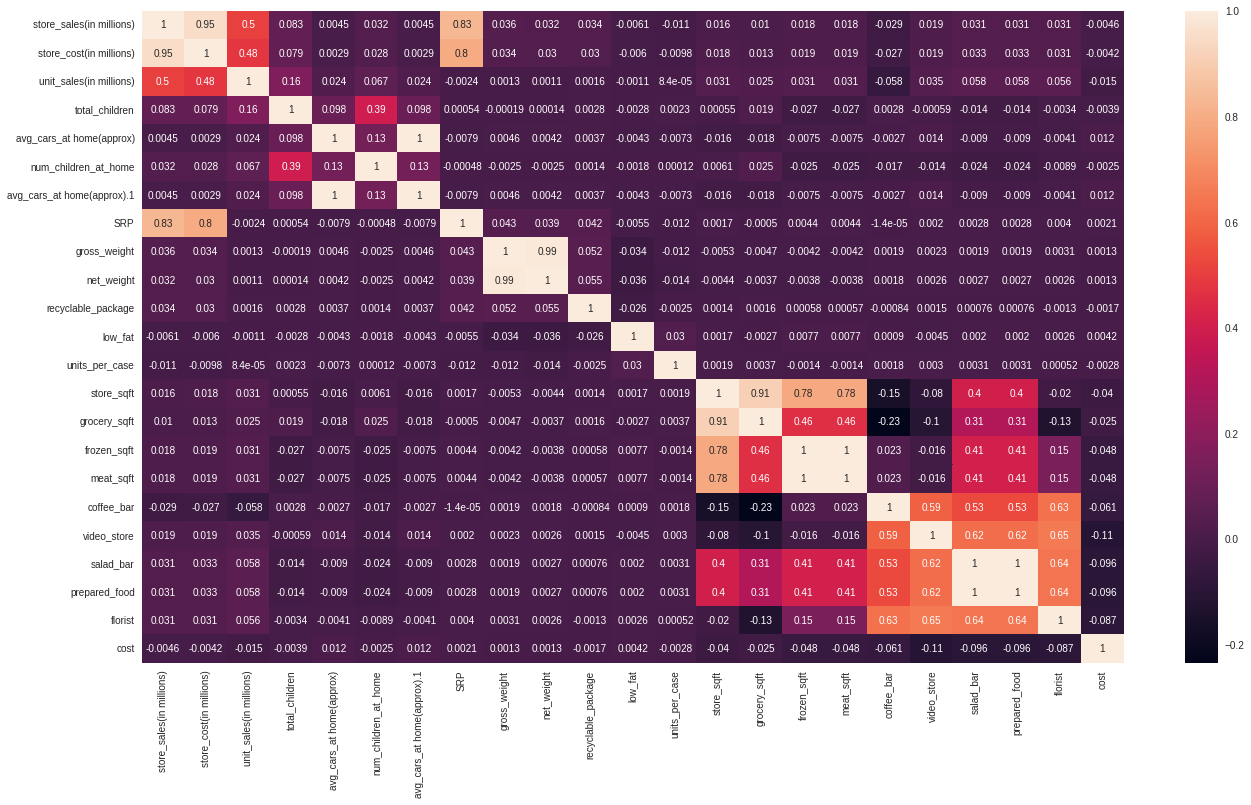

In [ ]:
plt.figure(figsize = (22,12))
ax = sns.heatmap(df.corr(), annot=True)

Choose threshold = 0.8 and -0.8 mean the two features have the strong positive and negative corellation. 


*   *SPR* has the strong correlation with *store_sales(in millions)* and *store_cost(in millions)*
*   Similarly, *gross_weight* vs *net_weight*
* *store_sqft* vs *grocery_sqft*
* *frozen_sqft* vs *meat_sqft*
* *prepared_food* vs *salad_bar*
* *avg_cars_at home(approx)* vs *avg_cars_at home(approx).1*

**Conclusion:** drop *store_sales(in millions)*, *store_cost(in millions)*, *net_weight*, *grocery_sqft*, *meat_sqft*, *salad_bar*


## **Split numerical and categorical features**

In [ ]:
def split_columns(df):
  num_cols = [col for col in df.columns if df[col].dtypes != 'object']
  cat_cols = [col for col in df.columns if df[col].dtypes == 'object']
  return num_cols, cat_cols

num_cols, cat_cols = split_columns(df)

In [ ]:
cat_cols

['food_category',
 'food_department',
 'food_family',
 'promotion_name',
 'sales_country',
 'marital_status',
 'gender',
 'education',
 'member_card',
 'occupation',
 'houseowner',
 'avg. yearly_income',
 'brand_name',
 'store_type',
 'store_city',
 'store_state',
 'media_type']

In [ ]:
def print_num_cats(df, cols):
  print('*** Number of category in each categorical feature ***')
  for col in cols:
    num = len(df[col].value_counts())
    print("{0} : {1}".format(col, num))

print_num_cats(df, cat_cols)

*** Number of category in each categorical feature ***
food_category : 45
food_department : 22
food_family : 3
promotion_name : 49
sales_country : 3
marital_status : 2
gender : 2
education : 5
member_card : 4
occupation : 5
houseowner : 2
avg. yearly_income : 8
brand_name : 111
store_type : 5
store_city : 19
store_state : 10
media_type : 13


## **Check data distribution**

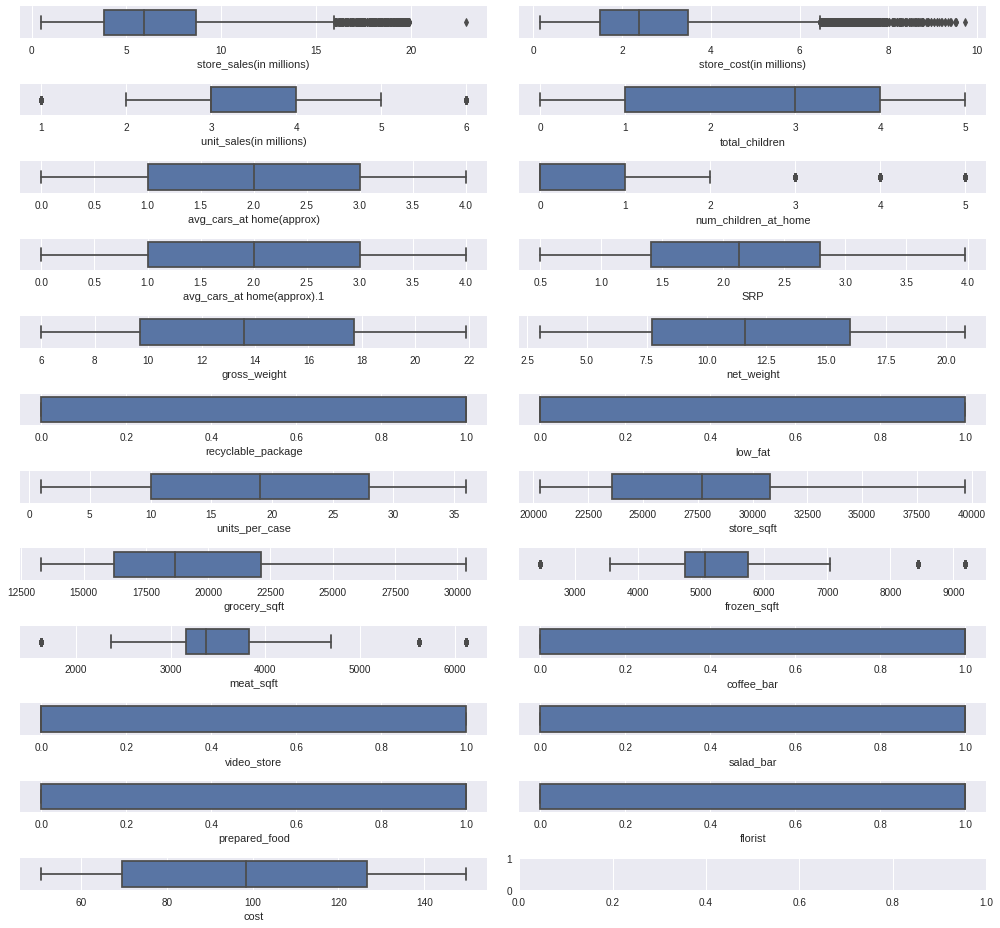

In [ ]:
row = int(math.ceil(len(num_cols) / 2))
fig, ax = plt.subplots(row,2,figsize=(14,13))
ax = ax.flatten()
for i,c in enumerate(num_cols):
  sns.boxplot(x=df[c], ax=ax[i])
fig.tight_layout()

## **EDA  insights**

1.   **Dataset includes:** 60428 records and 40 features
2.   **Missing values:** not any
3.   **Unnecessary features:** store_sales(in millions), store_cost(in millions)net_weight, grocery_sqft, meat_sqft, salad_bar, avg_cars_at home(approx).1
4.   **Feature names:** some need to rename to have the same format
5.   **Outliers:** need to handle outliers in these features

 *   **frozen_sqft** has outliers in range of [2000;3000] and [7500;10000]
 *   **num_children_at_home** has outliers in range of [3;6]
 *   **unit_sales** has outliers in range of [0;2) and (5;6] 
6.   **marital_status**, **gender** and **houseowner** need to be encoded to numerical values

## **Data Cleaning**
**Targets:**

*   Drop unnecessary features
*   Rename feature to the same format
*   Handle outlier using IQR



### **Drop unnecessary features**

In [ ]:
drop_cols = ['store_sales(in millions)', 'store_cost(in millions)', 'net_weight',
             'grocery_sqft', 'meat_sqft', 'salad_bar', 'avg_cars_at home(approx).1']
df.drop(columns=drop_cols, inplace=True)

### **Rename feature**

In [ ]:
rename_cols = {'unit_sales(in millions)':'unit_sales',
               'avg_cars_at home(approx)':'avg_cars_at home',
               'avg. yearly_income':'avg_yearly_income'}
df.rename(columns=rename_cols, inplace=True)

### **Using IQR to handle outlier**

In [ ]:
outlier_cols = ['frozen_sqft', 'num_children_at_home', 'unit_sales']

def outlier_thresholds(dataframe, feature):
  Q1 = dataframe[feature].quantile(0.25)
  Q3 = dataframe[feature].quantile(0.75)
  IQR = Q3 - Q1
  lower_limit = Q1 - 1.5*IQR
  upper_limit = Q3 + 1.5*IQR
  return lower_limit, upper_limit

def HandleOutliers(dataframe, columns):
  for col in columns:
    lower_limit, upper_limit = outlier_thresholds(dataframe,col)
    print(f'{col} has {dataframe[(dataframe[col] < lower_limit) | (dataframe[col] > upper_limit)].shape[0]} outliers')
    dataframe = dataframe[(dataframe[col] >= lower_limit) & (dataframe[col] <= upper_limit)]
  return dataframe

In [ ]:
df = HandleOutliers(df, outlier_cols)

frozen_sqft has 9996 outliers
num_children_at_home has 6979 outliers
unit_sales has 783 outliers


In [ ]:
# because we have dropped and modified some columns, so we have to re-split numerical and categorical features
num_cols, cat_cols = split_columns(df)

# **Part 3. Feature Engineering**
## **Target:**


*   Encode categorical feature into numeric value
*   Select feature that really impact on predictive feature
*   Scale data to range [0;1]
*   Split data for training and testing 



## **Feature Selection**


### **Pearsonr Correlation Coefficient**
**Hypothesis**


*   Null hypothesis (H0): the two samples are independent.
*   Alternative hypothesis (H1): there is a dependency between the samples.



In [ ]:
predictive_col = 'cost'
cols = []
stats = []
p_values = []
for i in num_cols:
  stat, p = pearsonr(df[i], df[predictive_col])
  cols.append(i)
  stats.append(stat)
  p_values.append(p)

d = {'Feature':cols, 'stat': stats, 'p-value': p_values}
df_num = pd.DataFrame(data=d)
df_num

,Feature,stat,p-value
0,unit_sales,-0.014106,3.568791e-03
1,total_children,0.000432,9.288194e-01
2,avg_cars_at home,0.007836,1.055434e-01
3,num_children_at_home,-0.001049,8.284272e-01
4,SRP,0.001270,7.930940e-01
5,gross_weight,-0.000020,9.966649e-01
6,recyclable_package,-0.006295,1.934740e-01
7,low_fat,0.006684,1.673983e-01
8,units_per_case,-0.000452,9.256249e-01
9,store_sqft,-0.050148,3.569624e-25


In [ ]:
temp = df_num[df_num['p-value'] < 0.05]['Feature'].tolist()
remove_cols = list(set(num_cols) - set(temp))
remove_cols

['recyclable_package',
 'avg_cars_at home',
 'SRP',
 'total_children',
 'gross_weight',
 'low_fat',
 'num_children_at_home',
 'units_per_case']

These above columns will be removed due to ***p-value*** doesn't meet the ***alternative hypothesis***, which means each of these feature is dependent to the target variable.

### **Drop dependent features**

In [ ]:
df.drop(columns=remove_cols, inplace=True)

## **Feature Encoding**

### **Norminal feature**

In [ ]:
# because we have dropped and modified some columns, so we have to re-split numerical and categorical features
num_cols, cat_cols = split_columns(df)
cat_cols.remove('member_card')

le = LabelEncoder()

def func_label_encode(data, cat_cols):
  for col in cat_cols:
    data[col] = le.fit_transform(data[col])

func_label_encode(df, cat_cols)

### **Ordinal feature**
Using OrinalEncoder to keep the rank, the priority queue of feature's data

In [ ]:
oe = OrdinalEncoder()

def func_ordinal_encode(data, cat_cols):
    data[[cat_cols]] = oe.fit_transform(data[[cat_cols]])

func_ordinal_encode(df, 'member_card')

## **Feature Scaling**

In [ ]:
scale_cols = []

for i in df.columns:
  if df[i].unique().size > 2:
    scale_cols.append(i)

scale_cols = list(set(scale_cols) - set("cost"))
scale_cols

['education',
 'food_category',
 'store_city',
 'cost',
 'member_card',
 'promotion_name',
 'store_type',
 'media_type',
 'avg_yearly_income',
 'unit_sales',
 'frozen_sqft',
 'brand_name',
 'store_sqft',
 'food_family',
 'store_state',
 'food_department',
 'sales_country',
 'occupation']

Before we conduct Feature Scaling, there are 2 approaching methods as Standardization and Normalization.


*   If the data has Gaussian Distribution (Normal distribution), use Standardization to scale.
*   Else, Normalization.



### **Check Gaussian Distribution**

*   Null hypothesis (H0): Sample doesn't look Gaussia.
*   Alternative hypothesis (H1): Sample looks Gaussia.

**Using Shapiro Test**

In [ ]:
from scipy.stats import shapiro
cols = []
stats = []
p_values = []
for i in scale_cols:
  stat, p = shapiro(df[i])
  cols.append(i)
  stats.append(stat)
  p_values.append(p)

d = {'Feature':cols, 'stat': stats, 'p-value': p_values}
df_scaling = pd.DataFrame(data=d)
print(f'Number of feature that have Gaussian Distribution = {df_scaling[df_scaling["p-value"] >= 0.05].shape[0]}')

Number of feature that have Gaussian Distribution = 0


**Using Normal Test**

In [ ]:
from scipy.stats import normaltest
cols = []
stats = []
p_values = []
for i in scale_cols:
  stat, p = normaltest(df[i])
  cols.append(i)
  stats.append(stat)
  p_values.append(p)

d = {'Feature':cols, 'stat': stats, 'p-value': p_values}
df_scaling = pd.DataFrame(data=d)
print(f"Number of feature that have Gaussian Distribution = {df_scaling[df_scaling['p-value'] >= 0.05].shape[0]}")

Number of feature that have Gaussian Distribution = 0


Since not any features have Gaussian Distribution. Therefore, we have to scale data using Normalization method.

### **Scaling**

In [ ]:
scaler = MinMaxScaler()
df[scale_cols] = scaler.fit_transform(df[scale_cols])

df.head()

,food_category,food_department,food_family,unit_sales,promotion_name,sales_country,marital_status,gender,education,member_card,occupation,houseowner,avg_yearly_income,brand_name,store_type,store_city,store_state,store_sqft,frozen_sqft,coffee_bar,video_store,prepared_food,florist,media_type,cost
0,0.090909,0.571429,0.5,0.666667,0.000000,1.0,0,0,1.0,0.666667,1.00,1,0.000000,0.181818,0.0,0.6,0.5,0.37741,0.532759,1.0,1.0,1.0,1.0,0.250000,0.766269
1,0.090909,0.571429,0.5,0.333333,0.125000,1.0,0,1,0.0,1.000000,0.75,1,0.714286,0.181818,0.0,0.6,0.5,0.37741,0.532759,1.0,1.0,1.0,1.0,0.250000,0.091653
2,0.090909,0.571429,0.5,0.000000,0.375000,1.0,1,0,1.0,0.666667,0.50,0,0.000000,0.181818,0.0,0.6,0.5,0.37741,0.532759,1.0,1.0,1.0,1.0,0.250000,0.337207
3,0.090909,0.571429,0.5,0.000000,0.125000,1.0,0,0,0.5,0.000000,0.50,1,0.571429,0.181818,0.0,0.6,0.5,0.37741,0.532759,1.0,1.0,1.0,1.0,0.416667,0.454628
4,0.090909,0.571429,0.5,0.333333,0.229167,1.0,0,1,1.0,0.000000,1.00,0,0.571429,0.436364,0.0,0.6,0.5,0.37741,0.532759,1.0,1.0,1.0,1.0,0.583333,0.000000


### **Slpit Training and Testing data**

In [ ]:
X = df.drop(['cost'],axis=1)
Y = df['cost']

X_train,X_test,y_train,y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [ ]:
print(f'Shape of X_train: {X_train.shape}')
print(f'Shape of y_train: {y_train.shape}')

Shape of X_train: (34136, 24)
Shape of y_train: (34136,)


# **Part 4. Modeling**

In [ ]:
def func_valid(param1, param2, param3, param4, param5, valid_name):
  li = [['Decision Tree Regressor', param1],
        ['Bagging Regressor', param2],
        ['LightGBM Regressor', param3],
        ['Support Vector Regression', param4],
        ['XGBoost Regressor', param5]]
    
  df_temp = pd.DataFrame(li, 
                  columns = ['Algorithm', valid_name]).sort_values(
                      by=[valid_name], ascending=True)
  
  fig = plt.figure(figsize = (10, 6))

  plt.barh(df_temp['Algorithm'], df_temp[valid_name])
 
  plt.ylabel("Algorithm")
  plt.xlabel(valid_name)
  plt.title("Evaluation of " + valid_name)

  for index, val in enumerate(df_temp[valid_name]):
    plt.text(val, index, str(round(val,5)), fontweight = 'bold')

  plt.show()

## **Decision Tree Regressor**

In [ ]:
DT_model = DecisionTreeRegressor(random_state=42)
t0 = time.time()
DT_model.fit(X_train, y_train)
DT_y_pred = DT_model.predict(X_test)
DT_time = time.time() - t0
DT_rmse = mean_squared_error(y_test, DT_y_pred, squared=False)

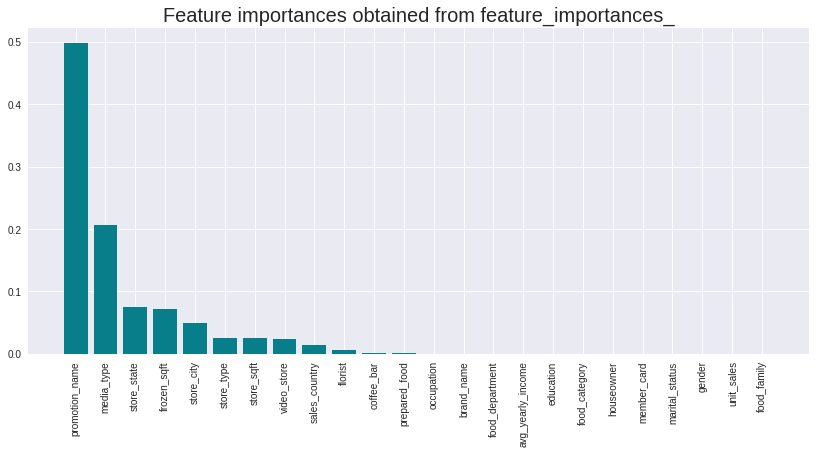

In [ ]:
DT_importances = pd.DataFrame(
    data={'Attribute': X_train.columns,
          'Importance': DT_model.feature_importances_})
DT_importances = DT_importances.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(14,6))
plt.bar(x=DT_importances['Attribute'], height=DT_importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from feature_importances_', size=20)
plt.xticks(rotation='vertical')
plt.show()

## **Bagging Regressor**

In [ ]:
BR_model = BaggingRegressor()
t0 = time.time()
BR_model.fit(X_train, y_train)
BR_y_pred = BR_model.predict(X_test)
BR_time = time.time() - t0
BR_rmse = mean_squared_error(y_test, BR_y_pred, squared=False)

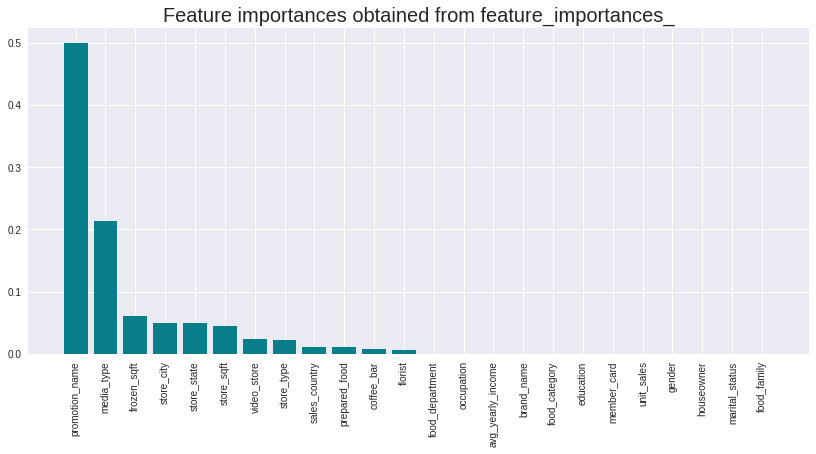

In [ ]:
BR_li_importances = np.mean([
    tree.feature_importances_ for tree in BR_model.estimators_
], axis=0)

BR_importances = pd.DataFrame(
    data={'Attribute': X_train.columns,
          'Importance': BR_li_importances})
BR_importances = BR_importances.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(14,6))
plt.bar(x=BR_importances['Attribute'], height=BR_importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from feature_importances_', size=20)
plt.xticks(rotation='vertical')
plt.show()

## **LightGBM Regressor**

In [ ]:
lgbm_model = LGBMRegressor(verbosity=0)
t0 = time.time()
lgbm_model.fit(X_train, y_train)
lgbm_y_pred = lgbm_model.predict(X_test)
lgbm_time = time.time() - t0
lgbm_rmse = mean_squared_error(y_test, lgbm_y_pred, squared=False)

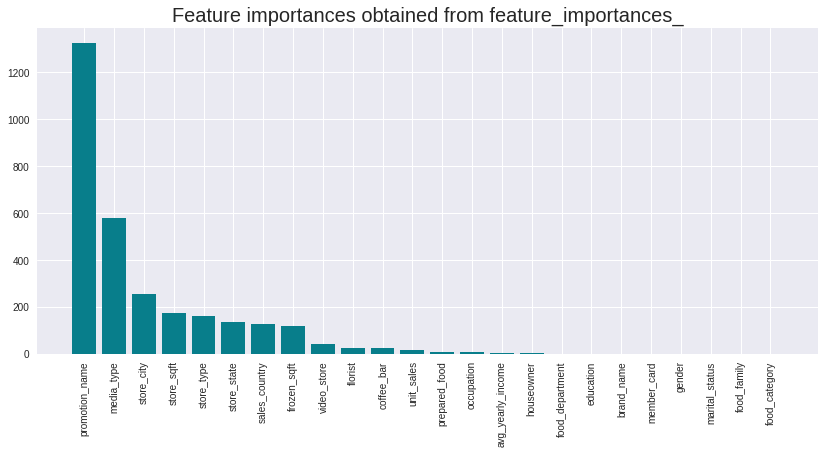

In [ ]:
lgbm_importances = pd.DataFrame(
    data={'Attribute': X_train.columns,
          'Importance': lgbm_model.feature_importances_})
lgbm_importances = lgbm_importances.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(14,6))
plt.bar(x=lgbm_importances['Attribute'], height=lgbm_importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from feature_importances_', size=20)
plt.xticks(rotation='vertical')
plt.show()

## **Support Vector Regressor**

In [ ]:
SVR_model= SVR()
t0 = time.time()
SVR_model.fit(X_train, y_train)
SVR_pred= SVR_model.predict(X_test)
SVR_time = time.time() - t0
SVR_rmse = mean_squared_error(y_test, lgbm_y_pred, squared=False)

## **XGBoost Regressor**

In [ ]:
XGB_model = XGBRegressor()
t0 = time.time()
XGB_model.fit(X_train, y_train)
XGB_pred = XGB_model.predict(X_test)
XGB_time = time.time() - t0
XGB_rmse = mean_squared_error(y_test, lgbm_y_pred, squared=False)

[03:11:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


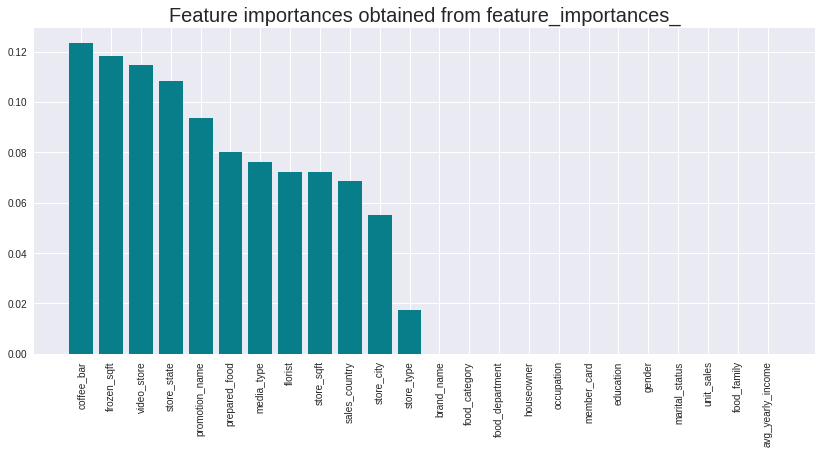

In [ ]:
XGB_importances = pd.DataFrame(
    data={'Attribute': X_train.columns,
          'Importance': XGB_model.feature_importances_})
XGB_importances = XGB_importances.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(14,6))
plt.bar(x=XGB_importances['Attribute'], height=XGB_importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from feature_importances_', size=20)
plt.xticks(rotation='vertical')
plt.show()

# **Part 5. Model Evaluation**

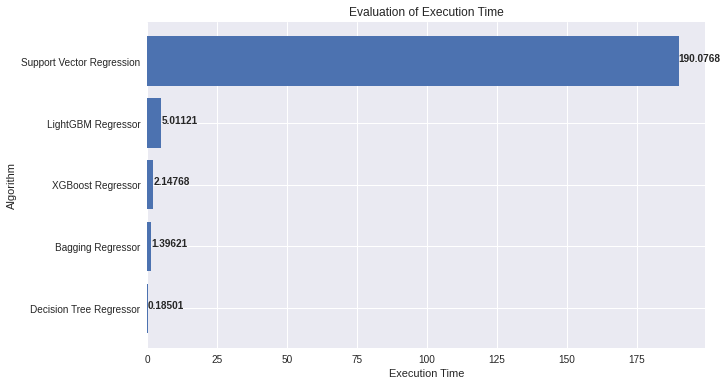

In [ ]:
func_valid(DT_time, BR_time, lgbm_time, SVR_time, XGB_time, "Execution Time")

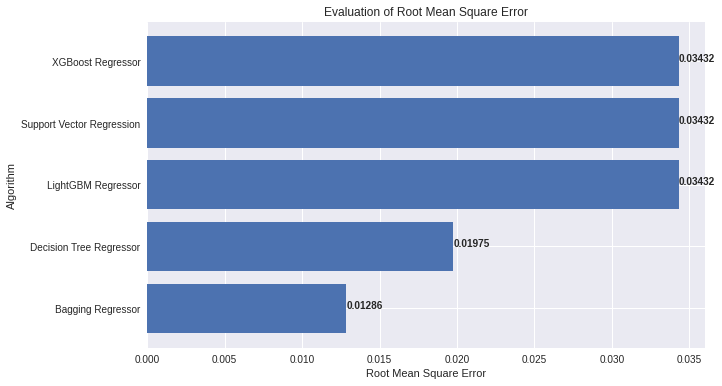

In [ ]:
func_valid(DT_rmse, BR_rmse, lgbm_rmse, SVR_rmse, XGB_rmse, "Root Mean Square Error")